To build a model that finds a linear relationship between expenses and profits.

Domain Analysis of Dataset

R&D Spend: Amount spent on Research and Development. Higher investment here often leads to innovation.(Continuous)(X)

Administration: Expenses related to administrative activities, e.g., HR, office management, legal, etc.(Continuous)(X)

Marketing Spend: Amount spent on advertising and promotions. Influences product reach and sales.(Continuous)(X)

State: Categorical variable showing where the company is located. States like CA, NY, FL.(Categorical)(X)

Profit: Net profit earned by the company. This is your prediction target.(Continuous)(y)

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Data

data = pd.read_csv("50_Startups_LR.csv")

In [3]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


EXPLORATORY DATA ANALYSIS

Step 1. Univariate Analysis

In [8]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


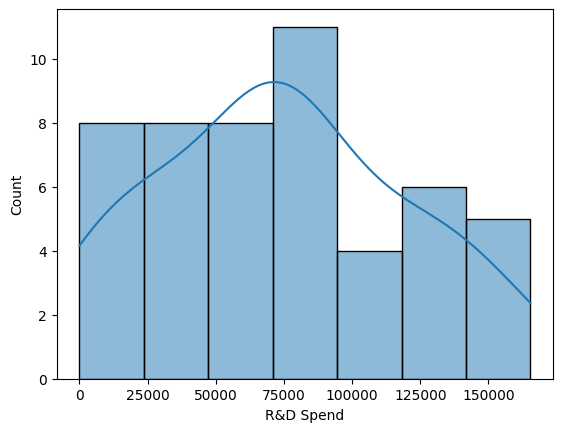

In [9]:
sns.histplot(x='R&D Spend', data=data, kde=True)
plt.show()

Insights

R&D spending is not uniformly distributed.

You may need to handle zero values (possibly as outliers).

This variable likely plays a significant role in predicting profit, given its strong variation.


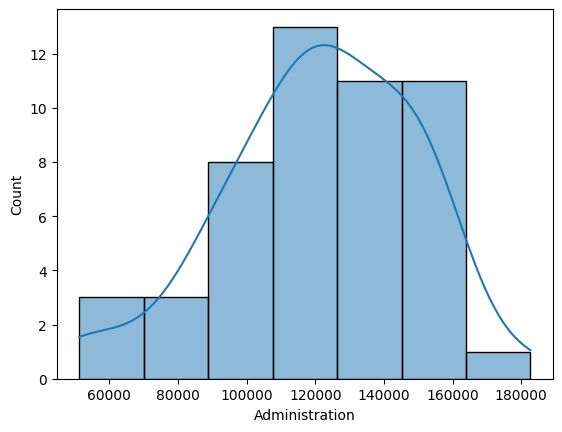

In [10]:
sns.histplot(x='Administration', data=data, kde=True)
plt.show()

Insights

Administration spending is fairly consistent across companies.

Since the variation is low, it might have less impact on profit prediction compared to R&D or Marketing Spend.

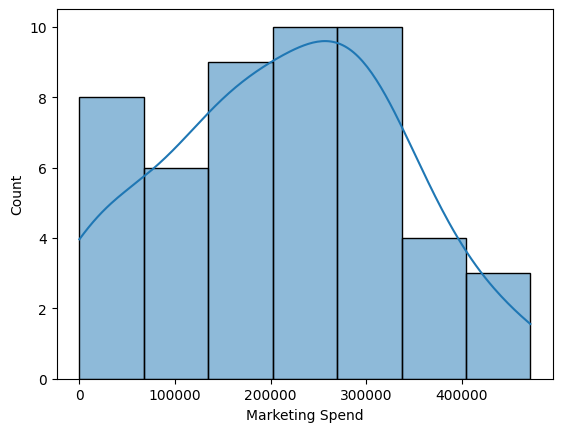

In [11]:
sns.histplot(x='Marketing Spend', data=data, kde=True)
plt.show()

Insights

Marketing spend varies widely across companies.

Because of its variability and outliers, it may have a significant impact on profit—but outliers or zero values might need special handling in regression.

Step 2. Bivariate Analysis

In [12]:
data.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


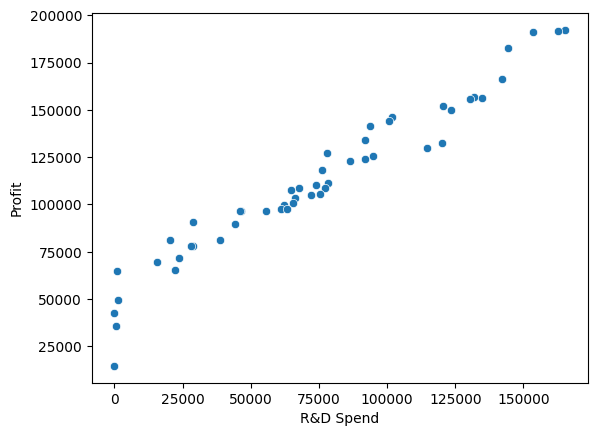

In [13]:
sns.scatterplot(x='R&D Spend', y='Profit', data=data)
plt.show()

Insights

As R&D Spend increases, Profit also increases.
linear relationship.



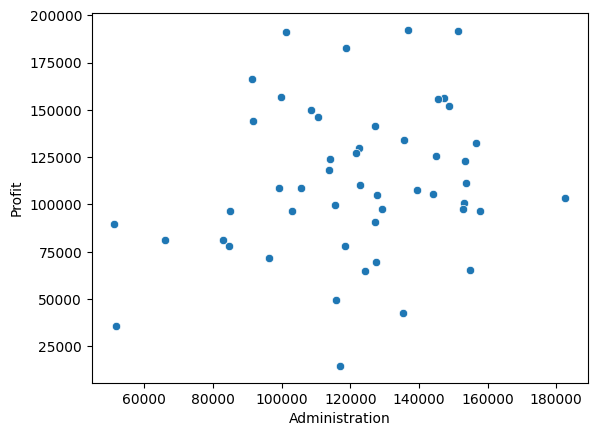

In [14]:
sns.scatterplot(x='Administration', y='Profit', data=data)
plt.show()

Insights

Weak or No Clear Correlation

Wide Spread of Profits at All Spend Levels

Potential Noise in the Model

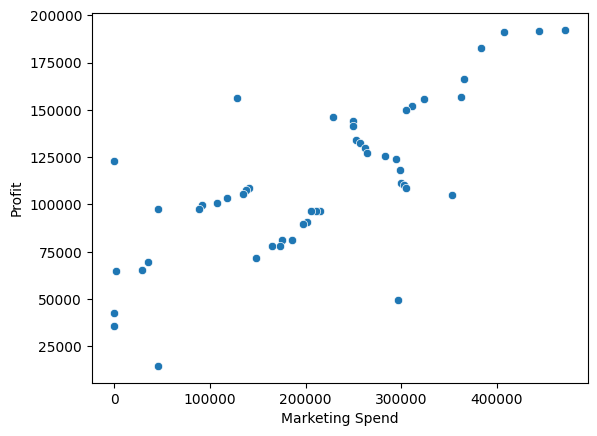

In [16]:
sns.scatterplot(x='Marketing Spend', y='Profit', data=data)
plt.show()

Insights

As Marketing Spend increases, Profit tends to increase, but the relationship is not as strong or linear as with R&D Spend.

The data points are somewhat spread, but there is still a visible upward trend.

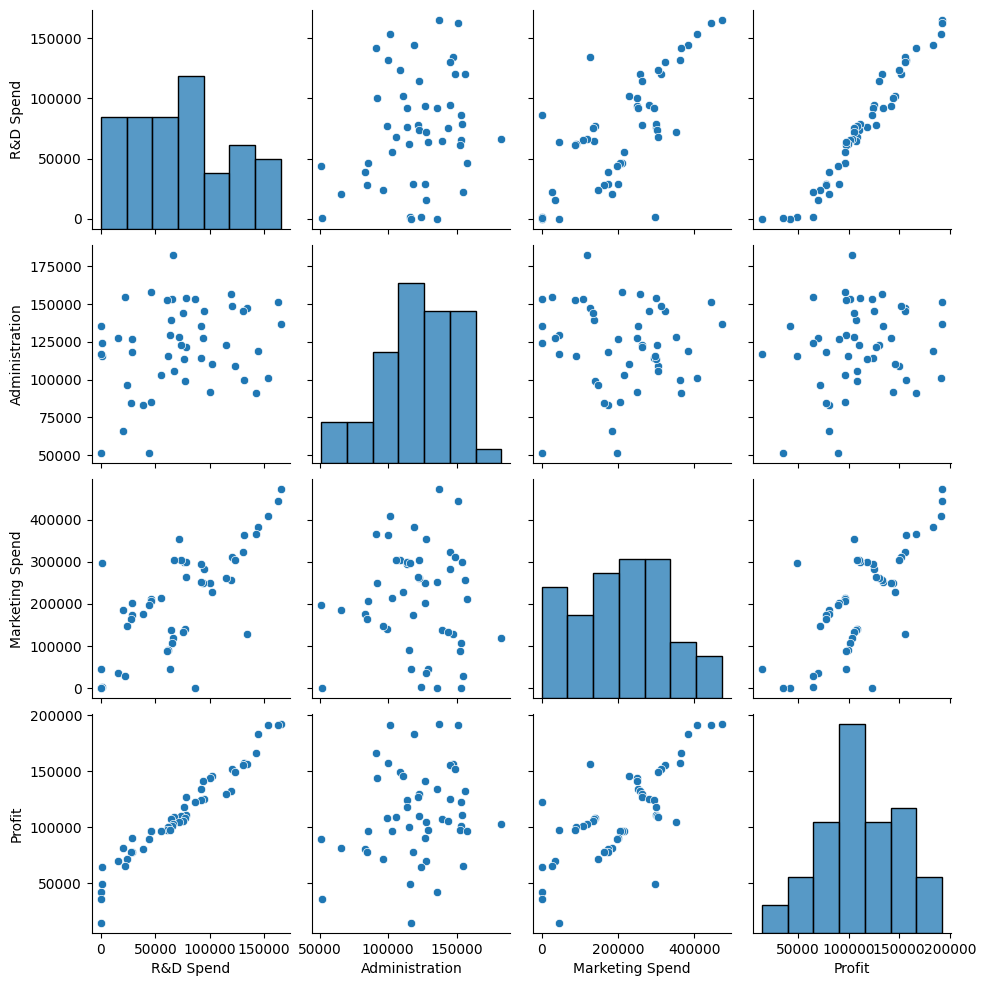

In [17]:
sns.pairplot(data=data)

Final Conclusion:
Feature	Correlation with Profit	Significance
R&D Spend	High (strong linear)
Marketing Spend	Medium (moderate spread)
Administration	Low/No correlation

✅ Focus on R&D Spend for driving higher profit.
📉 You might consider dropping Administration in a regression model due to weak impact.

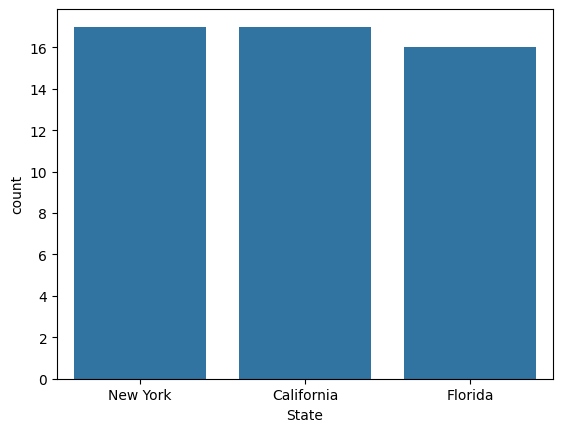

In [18]:
sns.countplot(x='State', data=data)
plt.show()


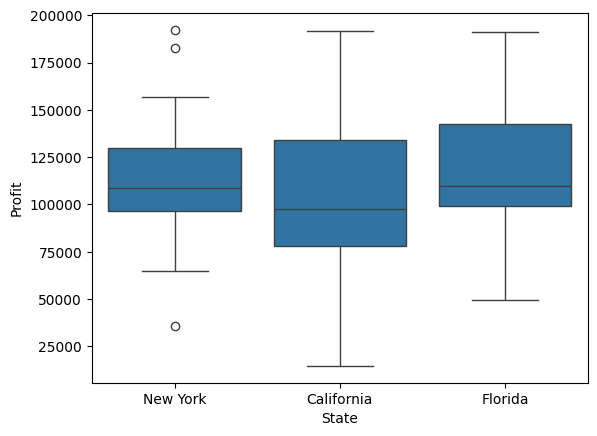

In [19]:
sns.boxplot(x='State', y='Profit', data=data)
plt.show()

New York found some outliers

Feature Engineering and Data Preprocessing

In [20]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: xlabel='R&D Spend'>

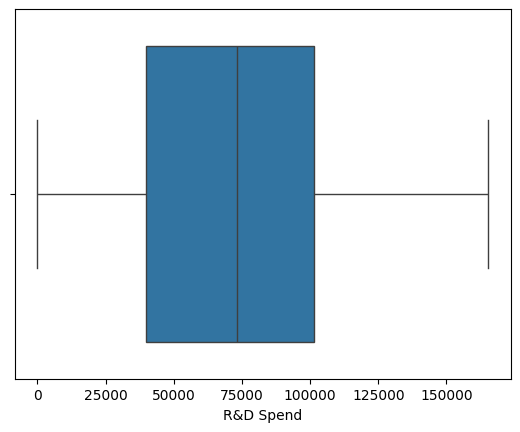

In [21]:
sns.boxplot(x='R&D Spend', data=data)

In [22]:
data.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


<Axes: xlabel='Administration'>

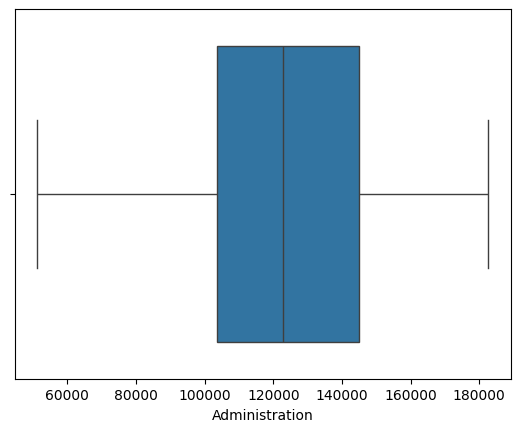

In [23]:
sns.boxplot(x='Administration', data=data)

<Axes: xlabel='Marketing Spend'>

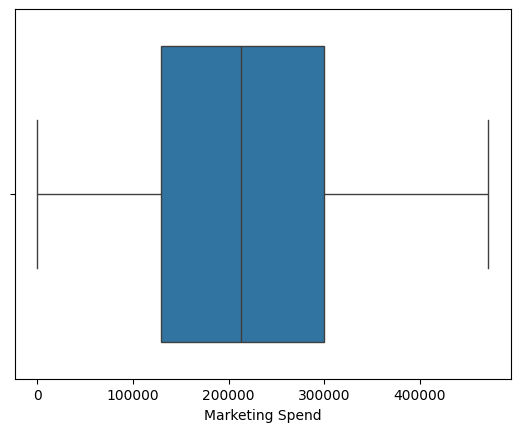

In [25]:
sns.boxplot(x='Marketing Spend', data=data)

<Axes: xlabel='State'>

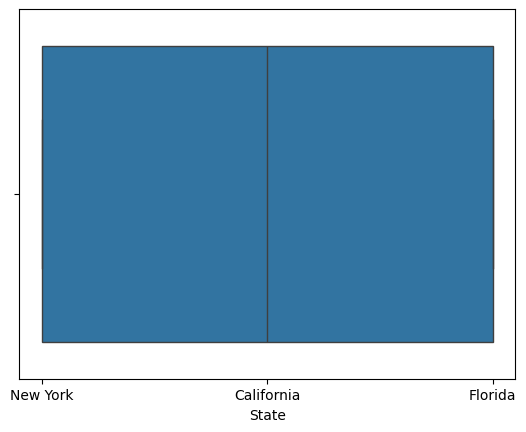

In [26]:
sns.boxplot(x='State', data=data)

<Axes: xlabel='Profit'>

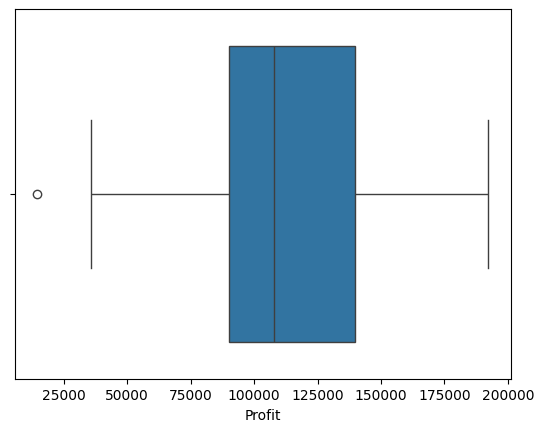

In [28]:
sns.boxplot(x='Profit', data=data)

FEATURE SELECTION

In [29]:
l1 = ['State']
data.drop(l1, axis=1, inplace=True)

In [30]:
data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [31]:
tc = data.corr()

In [32]:
tc

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

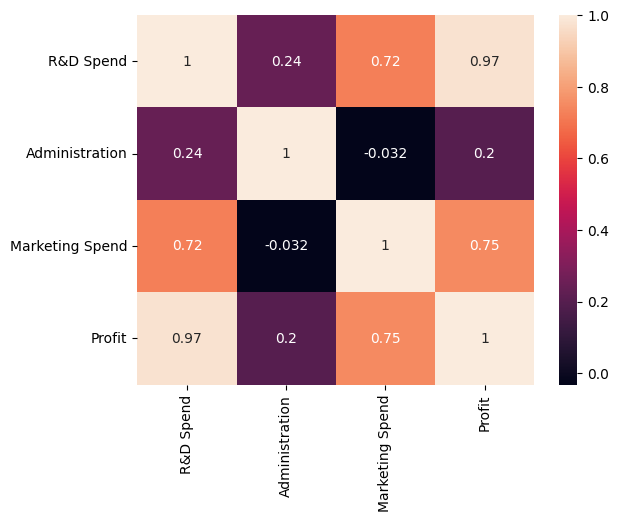

In [33]:
sns.heatmap(tc, annot=True)

MODEL CREATION

In [34]:
data.head(1)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.2,136897.8,471784.1,192261.83


Step 1. Independent and dependent variable creation

In [37]:
X = data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = data.Profit

In [38]:
X

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [39]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

Step 2. Train and Test data creation

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [42]:
len(X_train)

37

In [43]:
len(X_test)

13

In [44]:
len(y_train)

37

In [45]:
len(y_test)

13

Step 3. Creating LR model

In [47]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)


LinearRegression()

In [48]:
y_predict = LR.predict(X_test)

In [49]:
y_predict

array([126432.21354192,  85502.50398527,  99003.12574173,  46163.70173114,
       128645.99157053,  52188.50492673, 108562.55837568, 100459.7619706 ,
        97565.18114776, 112618.38433624, 128589.18988353, 174378.83280484,
        93459.27699416])

In [50]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
12    141585.52
4     166187.94
37     89949.14
Name: Profit, dtype: float64

In [51]:
LR.coef_

array([ 0.80929474, -0.08912612,  0.03046688])

In [52]:
LR.intercept_

np.float64(56361.493002325165)

Step 4. Model Evaluation

In [53]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [54]:
r2score

0.9193827032400598

In [56]:
X_test.shape

(13, 3)

In [57]:
adjusted_r2 = 1-((1-0.9193827032400598)*(13-1)/(13-3-1))
adjusted_r2

0.8925102709867464

In [58]:
import math
print(mean_squared_error(y_test,y_predict))

86644383.23852444


In [59]:
print(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error

9308.296473497416
